In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

df = pd.read_csv('shopping_trends.csv')

# Bước 3: Xử lý dữ liệu
# Mã hóa biến phân loại 'Subscription Status' thành 1 (Yes) và 0 (No)
df['Subscription Status'] = df['Subscription Status'].apply(lambda x: 1 if x == 'Yes' else 0)

# Mã hóa biến 'Gender' thành số (giả sử 'Male' là 1 và 'Female' là 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Kiểm tra xem còn biến nào cần mã hóa không. Nếu có cột phân loại khác, dùng One-Hot Encoding:
df = pd.get_dummies(df, columns=['Category'], drop_first=True)

# Bước 4: Chọn biến độc lập (X) và biến phụ thuộc (y)
# Giả sử các biến ảnh hưởng bao gồm 'Age', 'Gender', 'Purchase Amount (USD)', 'Discount Applied', 'Frequency of Purchases'
X = df[['Age']]
y = df['Subscription Status']

# Bước 5: Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bước 6: Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Bước 7: Khởi tạo và huấn luyện mô hình Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Bước 8: Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Lấy xác suất cho lớp 1 (Yes)

# Bước 9: Đánh giá mô hình
# Độ chính xác, ma trận nhầm lẫn, báo cáo phân loại
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Bước 10: Vẽ biểu đồ ROC và tính AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Accuracy: 0.8256410256410256
Confusion Matrix:
 [[422 136]
 [  0 222]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.76      0.86       558
           1       0.62      1.00      0.77       222

    accuracy                           0.83       780
   macro avg       0.81      0.88      0.81       780
weighted avg       0.89      0.83      0.83       780



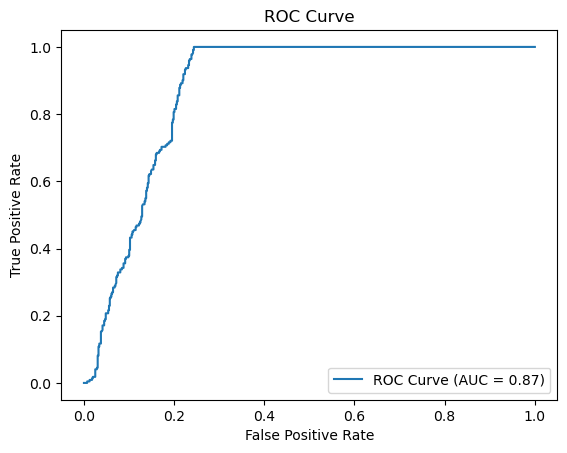

In [7]:
# Bước 1: Import các thư viện cần thiết
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Bước 2: Đọc dữ liệu
df = pd.read_csv('shopping_trends.csv')

# Bước 3: Xử lý dữ liệu
# Mã hóa biến phân loại 'Subscription Status' thành 1 (Yes) và 0 (No)
df['Subscription Status'] = df['Subscription Status'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Discount Applied'] = df['Discount Applied'].apply(lambda x: 1 if x == 'Yes' else 0)



# Bước 4: Chọn biến độc lập (X) và biến phụ thuộc (y)
# Giả sử các biến ảnh hưởng bao gồm 'Age', 'Gender', 'Purchase Amount (USD)', 'Discount Applied', 'Frequency of Purchases'
X = df[['Age', 'Discount Applied', 'Purchase Amount (USD)']]
y = df['Subscription Status']

# Bước 5: Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bước 6: Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Bước 7: Khởi tạo và huấn luyện mô hình Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Bước 8: Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Lấy xác suất cho lớp 1 (Yes)

# Bước 9: Đánh giá mô hình
# Độ chính xác, ma trận nhầm lẫn, báo cáo phân loại
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Bước 10: Vẽ biểu đồ ROC và tính AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
